In [1]:
import os 
import zipfile
import random
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile

# 1: Prepare the data

In [2]:
try:
    os.mkdir('cats_and_dogs')
    os.mkdir('cats_and_dogs/training')
    os.mkdir('cats_and_dogs/testing')
    os.mkdir('cats_and_dogs/training/cats')
    os.mkdir('cats_and_dogs/training/dogs')
    os.mkdir('cats_and_dogs/testing/cats')
    os.mkdir('cats_and_dogs/testing/dogs')
except OSError:
    pass

def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):
    files = []
    for filename in os.listdir(SOURCE):
        file = SOURCE + filename
        if os.path.getsize(file) > 0:
            files.append(filename)
        else:
            print(filename + " is zero length, so ignoring.")
 
    training_length = int(len(files) * SPLIT_SIZE)
    testing_length = int(len(files) - training_length)
    
    shuffled_set = random.sample(files, len(files))
    
    # Set train and test
    training_set = shuffled_set[0:training_length]
    testing_set = shuffled_set[:testing_length]
 
    for filename in training_set:
        this_file = SOURCE + filename
        destination = TRAINING + filename
        copyfile(this_file, destination)
 
    for filename in testing_set:
        this_file = SOURCE + filename
        destination = TESTING + filename
        copyfile(this_file, destination)
        
 
  # Data of cats
CAT_SOURCE_DIR = "cats_and_dogs/PetImages/Cat/"
TRAINING_CATS_DIR = "cats_and_dogs/training/cats/"
TESTING_CATS_DIR = "cats_and_dogs/testing/cats/"

  # Data of dogs
DOG_SOURCE_DIR = "cats_and_dogs/PetImages/Dog/"
TRAINING_DOGS_DIR = "cats_and_dogs/training/dogs/"
TESTING_DOGS_DIR = "cats_and_dogs/testing/dogs/"
 
split_size = .9
split_data(CAT_SOURCE_DIR, TRAINING_CATS_DIR, TESTING_CATS_DIR, split_size)
split_data(DOG_SOURCE_DIR, TRAINING_DOGS_DIR, TESTING_DOGS_DIR, split_size)
# Expected output
# 666.jpg is zero length, so ignoring
# 11702.jpg is zero length, so ignoring

666.jpg is zero length, so ignoring.
11702.jpg is zero length, so ignoring.


# 2: check length of training set and test set

In [3]:
'''Check len in file'''
print(len(os.listdir('cats_and_dogs/training/cats/')))
print(len(os.listdir('cats_and_dogs/training/dogs/')))
print(len(os.listdir('cats_and_dogs/testing/cats/')))
print(len(os.listdir('cats_and_dogs/testing/dogs/')))

12478
12485
3629
3408


# 3: Define the model

In [4]:
model = tf.keras.models.Sequential([
#     16 layers
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    
#     32 layers
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    
#     64 layers
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    
#     128 dense layers, and 10 output layers
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
]) 
model.compile(optimizer=RMSprop(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# 4: Train the model

In [5]:
TRAINING_DIR = "cats_and_dogs/training/"
train_datagen = ImageDataGenerator(rescale=1.0/255.)

'''train_generator'''
train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    batch_size=100,
                                                    class_mode='binary',
                                                    target_size=(150, 150))
 
    
    
VALIDATION_DIR = "cats_and_dogs/testing/"
validation_datagen = ImageDataGenerator(rescale=1.0/255.)

'''validation_generator'''
validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                              batch_size=100,
                                                              class_mode='binary',
                                                              target_size=(150, 150))
 
# Expected Output:
# Found 22498 images belonging to 2 classes.
# Found 2500 images belonging to 2 classes.

Found 24961 images belonging to 2 classes.
Found 7036 images belonging to 2 classes.


In [6]:
history = model.fit_generator(train_generator,
                              epochs=1,
                              verbose=1,
                              validation_data=validation_generator) #By setting verbose 0, 1 or 2 you just say how do you want to 'see' the training progress for each epoch.

Instructions for updating:
Please use Model.fit, which supports generators.
  2/250 [..............................] - ETA: 2:31 - loss: 0.8518 - accuracy: 0.4300

/home/khoa/anaconda3/envs/tf2.0/lib/python3.8/site-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  warnings.warn(
/home/khoa/anaconda3/envs/tf2.0/lib/python3.8/site-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  warnings.warn(
/home/khoa/anaconda3/envs/tf2.0/lib/python3.8/site-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  warnings.warn(
/home/khoa/anaconda3/envs/tf2.0/lib/python3.8/site-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  warnings.warn(
/home/khoa/anaconda3/envs/tf2.0/lib/python3.8/site-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Ski

250/250 [==============================] - 311s 1s/step - loss: 0.6169 - accuracy: 0.6718 - val_loss: 0.5279 - val_accuracy: 0.7555


<Figure size 432x288 with 0 Axes>

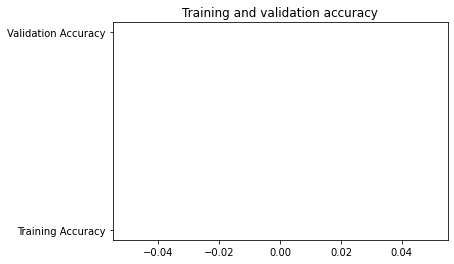

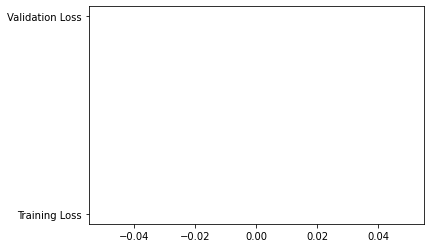

<Figure size 432x288 with 0 Axes>

In [7]:
%matplotlib inline
import matplotlib.image  as mpimg
import matplotlib.pyplot as plt
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']
 
epochs=range(len(acc)) # Get number of epochs
 
#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()
 
#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.figure()

# test model

In [8]:
'''Name of labels have to include(a number + '.jpg')'''
def label_img(img):
    word_label = img.split('.')[0]
    return word_label

In [9]:
from tqdm import tqdm  
IMG_SIZE = 300
second_test_dir = 'cats_and_dogs/set a test/'
def second_test_data():
    test_data = []
    for img in tqdm(os.listdir(second_test_dir)): #  to get the list of all files and directories in the specified directory. If we don’t specify any directory, then list of files and directories in the current working directory will be returned.
        label = label_img(img)
        path = os.path.join(second_test_dir, img)
        
        img = cv2.imread(path, cv2.IMREAD_GRAYSCALE) # == (img = cv2.imread(path, 0))
        print(img.shape)
        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
        test_data.append(  [np.array(img), label]  )
    shuffle(test_data)
    np.save('set a test.npy', test_data)
    return test_data

In [10]:
import cv2                       # working with, mainly resizing, images
import numpy as np               # dealing with arrays
import os                        # dealing with directories
from random import shuffle       # mixing up or currently ordered data that might lead our network astray in training.
from tqdm import tqdm            # a nice pretty percentage bar for tasks. Thanks to viewer Daniel BA1/4hler for this suggestion
import matplotlib.pyplot as plt

In [11]:
second_test_data()

100%|██████████| 6/6 [00:00<00:00, 211.54it/s]

(376, 500)
(500, 495)
(375, 500)
(346, 461)
(288, 300)
(304, 400)



/home/khoa/anaconda3/envs/tf2.0/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


[[array([[ 30,  26,  24, ..., 170, 169, 168],
         [ 22,  25,  28, ..., 179, 178, 172],
         [ 27,  31,  34, ..., 178, 180, 170],
         ...,
         [231, 236, 236, ...,  83,  82,  81],
         [230, 236, 233, ...,  87,  88,  88],
         [230, 236, 232, ...,  89,  91,  91]], dtype=uint8),
  '8'],
 [array([[249, 225, 230, ..., 229, 222, 228],
         [221, 195, 198, ..., 197, 188, 190],
         [220, 193, 194, ..., 194, 181, 179],
         ...,
         [ 70,  60,  63, ...,  50,  49,  59],
         [ 73,  63,  66, ...,  54,  53,  62],
         [ 82,  72,  75, ...,  61,  60,  70]], dtype=uint8),
  '6'],
 [array([[145, 143, 143, ...,  29,  26,  26],
         [149, 148, 147, ...,  33,  30,  29],
         [152, 152, 150, ...,  36,  34,  32],
         ...,
         [ 16,  20,  21, ...,  40,  35,  35],
         [ 16,  19,  19, ...,  36,  32,  37],
         [ 15,  19,  20, ...,  37,  34,  35]], dtype=uint8),
  '4'],
 [array([[226, 229, 226, ..., 182, 174, 151],
         [229, 

In [12]:
second_test_data = second_test_data()

100%|██████████| 6/6 [00:00<00:00, 353.75it/s]

(376, 500)
(500, 495)
(375, 500)
(346, 461)
(288, 300)
(304, 400)


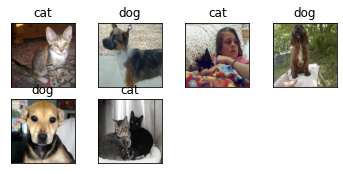

In [13]:
from keras.preprocessing import image
import matplotlib.pyplot as plt
 
size = 150
    
test_data = np.load('set a test.npy', allow_pickle=True)
 
fig=plt.figure()
for num,data in enumerate(second_test_data[0:8]):
    
    img_num = data[1]
    path = 'cats_and_dogs/set a test/' + data[1] + '.jpg'
    img = image.load_img(path, target_size=(size, size))
    
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    
    images = np.vstack([x])
    
    y = fig.add_subplot(3,4,num+1)
    
    model_out = model.predict(images, batch_size=10)
      
    if model_out == 1.0: str_label='dog'
    else: str_label='cat'
        
    y.imshow(img)
#     y.imshow(img,cmap='jet')
    plt.title(str_label)
    y.axes.get_xaxis().set_visible(False)
    y.axes.get_yaxis().set_visible(False)
plt.show()